In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
cat4=cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [10]:
cat4 =cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

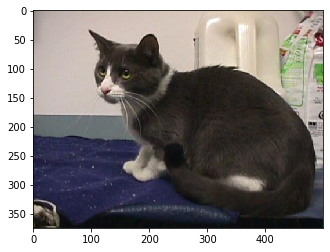

In [11]:
plt.imshow(cat4)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
image_gen= ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                             )

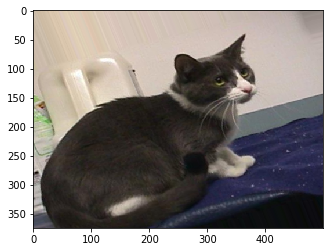

In [16]:
plt.imshow(image_gen.random_transform(cat4))

In [19]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [22]:
input_shape=(150,150,3)

In [23]:
from keras.models import Sequential

In [25]:
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [26]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [28]:
batch_size=16
training_image_gen= image_gen.flow_from_directory('CATS_DOGS/train',
                                                 target_size=input_shape[:2],
                                                 batch_size=batch_size,
                                                 class_mode='binary')

Found 18743 images belonging to 2 classes.


In [29]:
test_image_gen=image_gen.flow_from_directory('CATS_DOGS/test',
                                            target_size=input_shape[:2],
                                            batch_size=batch_size,
                                            class_mode='binary')

Found 6251 images belonging to 2 classes.


In [30]:
training_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [32]:
results = model.fit_generator(training_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
111/150 [=====================>........] - ETA: 18s - loss: 0.6936 - accuracy: 0.5214

C:\Users\User\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\User\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\User\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\User\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\User\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8

150/150 [==============================] - 74s 495ms/step - loss: 0.6903 - accuracy: 0.5308 - val_loss: 0.6665 - val_accuracy: 0.6198


In [33]:
results.history['accuracy']

[0.5308333]

In [36]:
from keras.models import load_model

In [37]:
new_model=load_model('cat_dog_100epochs.h5')

In [38]:
dog_file='CATS_DOGS/test/DOG/10005.jpg'

In [39]:
from keras.preprocessing import image

In [40]:
dog_img=image.load_img(dog_file,target_size=(150,150))

In [41]:
dog_img=image.img_to_array(dog_img)

In [42]:
import numpy as np

In [43]:
dog_img=np.expand_dims(dog_img,axis=0)

In [44]:
dog_img=dog_img/255

In [45]:
model.predict_classes(dog_img)

array([[1]])

In [47]:
model.predict(dog_img)

array([[0.52076685]], dtype=float32)